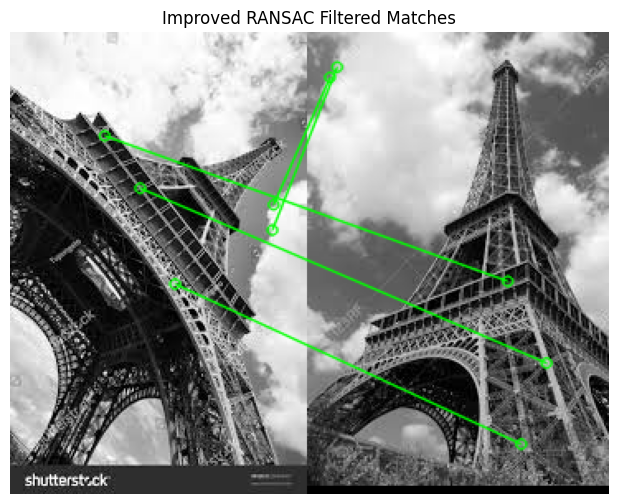

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images in grayscale
img1 = cv2.imread('im1.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('im2.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if img1 is None or img2 is None:
    print("Error loading images. Check file names.")
    exit()

# Detect keypoints using SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match descriptors using BFMatcher with ratio test
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

if len(pts1) >= 4 and len(pts2) >= 4:
    H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)
    matches_mask = mask.ravel().tolist()

    # Draw matches with lines
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                  matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display result with improved match visualization
    plt.figure(figsize=(12, 6))
    plt.title("Improved RANSAC Filtered Matches")
    plt.imshow(img_matches)
    plt.axis('off')
    plt.show()
else:
    print(f"Not enough good matches for RANSAC (found {len(pts1)}). Need at least 4.")
